In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


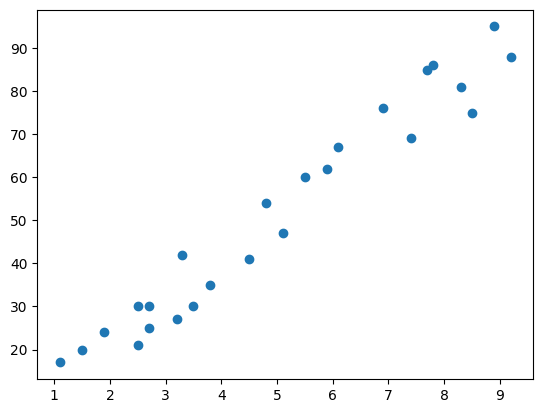

In [49]:
dataset = pd.read_csv('/content/studentscores-1fef94ba-27e1-4fab-a7ad-56867b8fb5a1.csv')
print(dataset)
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.show()

In [50]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values
print(Y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [52]:
#Y = MX+c

In [53]:
from typing_extensions import Self
class Model():

  def __init__(self,Learning_rate ,iteration):
    self.Learning_rate = Learning_rate
    self.iteration = iteration
  def predict(self,X):
    return X.dot(self.slope)+self.const
  def fit(self, X, Y):
    self.m,self.n = X.shape
    self.slope = np.zeros(self.n)
    self.const = 0
    self.X = X
    self.Y = Y

    for i in range(self.iteration):
      self.update_weights()
    return self
  def update_weights(self):
    Y_pred = self.predict(self.X)
    dW =-(2*(self.X.T).dot(self.Y-Y_pred))/self.m
    db=-2*np.sum(self.Y-Y_pred)/self.m
    self.slope=self.slope-self.Learning_rate*dW
    self.const=self.const-self.Learning_rate*db



In [54]:
model =Model(Learning_rate=0.01,iteration=1000)
model.fit(X,Y)

[26.91171724 52.33687281 33.75695143 85.58515317 36.69062323 17.13281125
 92.43038736 56.24843521 83.62937197 28.86749844 77.76202838 60.1599976
 46.46952922 34.73484203 13.22124886 89.49671557 26.91171724 21.04437365
 62.1157788  74.82835658 28.86749844 49.40320102 39.62429503 69.93890359
 78.73991898]


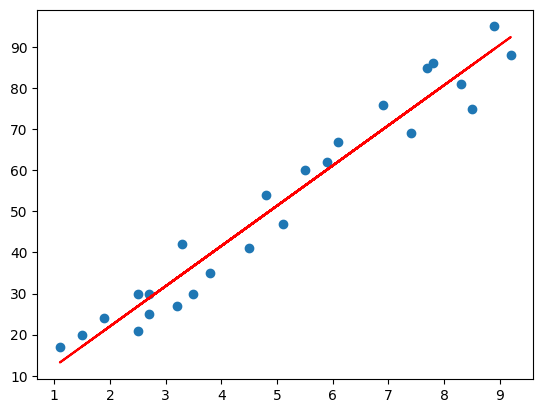

In [55]:
Y_pred=model.predict(X)
print(Y_pred)
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.plot(X,Y_pred,color='red')
plt.show()

In [56]:
print(model.slope,model.const)

[9.77890599] 2.4644522714760995


In [57]:

#4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [58]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)

data = data.dropna()

train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

In [59]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions-train_output)
        dm = 2 * np.mean(np.multiply(train_input, df))
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        self.loss = []

        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')

        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))
            return line,

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss

Iteration = 1, Loss = 3658.229620564756
Iteration = 1, Loss = 1446.958254731084
Iteration = 1, Loss = 1158.6136249064334
Iteration = 1, Loss = 1118.1173559233432
Iteration = 2, Loss = 1109.5886889466062
Iteration = 3, Loss = 1105.2051738006219
Iteration = 4, Loss = 1101.3809194551122
Iteration = 5, Loss = 1097.653592905264
Iteration = 6, Loss = 1093.963420163947
Iteration = 7, Loss = 1090.3025096448603
Iteration = 8, Loss = 1086.6696576897189
Iteration = 9, Loss = 1083.0645239891096
Iteration = 10, Loss = 1079.4868809121824
Iteration = 11, Loss = 1075.9365167510787
Iteration = 12, Loss = 1072.4132232405973
Iteration = 13, Loss = 1068.9167939391498
Iteration = 14, Loss = 1065.4470240095814
Iteration = 15, Loss = 1062.0037101804812
Iteration = 16, Loss = 1058.5866507308358
Iteration = 17, Loss = 1055.1956454777664
Iteration = 18, Loss = 1051.830495764746
Iteration = 19, Loss = 1048.4910044499534
Iteration = 20, Loss = 1045.1769758947223
Iteration = 21, Loss = 1041.8882159520822
Iteration

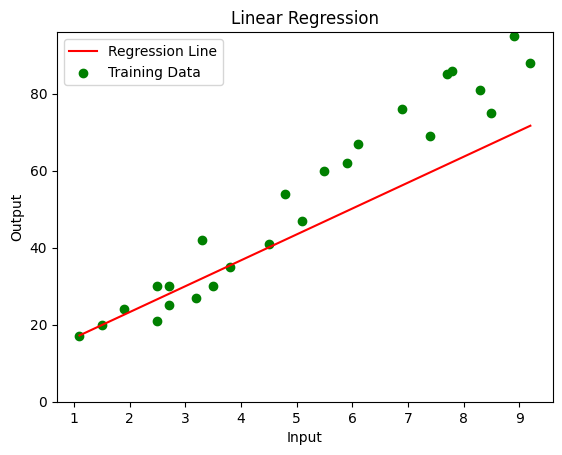

In [60]:
model= LinearRegression()
parameters,loss = model.train(X,Y,learning_rate=0.01,iters=50)

In [61]:
#4
dataset = pd.read_csv('/content/50_Startups-61ce93eb-d671-42db-a5e1-005e0a176393.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [62]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [64]:
regressor.fit(x_train,y_train)
Y_pred=regressor.predict(x_test)
print(Y_pred)


[103901.8969696  132763.05993126 133567.90370044  72911.78976736
 179627.92567224 115166.64864795  67113.5769057   98154.80686776
 114756.11555221 169064.01408795]


In [65]:
for i,(pred,actual) in enumerate(zip(Y_pred,y_test)):
  print(f"sample {i+1}: Predicted={pred:.2f}, Actual={actual:.2f}")

sample 1: Predicted=103901.90, Actual=103282.38
sample 2: Predicted=132763.06, Actual=144259.40
sample 3: Predicted=133567.90, Actual=146121.95
sample 4: Predicted=72911.79, Actual=77798.83
sample 5: Predicted=179627.93, Actual=191050.39
sample 6: Predicted=115166.65, Actual=105008.31
sample 7: Predicted=67113.58, Actual=81229.06
sample 8: Predicted=98154.81, Actual=97483.56
sample 9: Predicted=114756.12, Actual=110352.25
sample 10: Predicted=169064.01, Actual=166187.94


In [66]:
print("coefficients:",regressor.coef_)
print("intercept:",regressor.intercept_)

coefficients: [0.77884104 0.0293919  0.03471025]
intercept: 42989.00816508669


In [67]:
#6

dataset = pd.read_csv('/content/studentscores-1fef94ba-27e1-4fab-a7ad-56867b8fb5a1.csv')
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values


In [68]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [70]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
print(X_poly)

[[  1.      2.5     6.25   15.625]
 [  1.      5.1    26.01  132.651]
 [  1.      3.2    10.24   32.768]
 [  1.      8.5    72.25  614.125]
 [  1.      3.5    12.25   42.875]
 [  1.      1.5     2.25    3.375]
 [  1.      9.2    84.64  778.688]
 [  1.      5.5    30.25  166.375]
 [  1.      8.3    68.89  571.787]
 [  1.      2.7     7.29   19.683]
 [  1.      7.7    59.29  456.533]
 [  1.      5.9    34.81  205.379]
 [  1.      4.5    20.25   91.125]
 [  1.      3.3    10.89   35.937]
 [  1.      1.1     1.21    1.331]
 [  1.      8.9    79.21  704.969]
 [  1.      2.5     6.25   15.625]
 [  1.      1.9     3.61    6.859]
 [  1.      6.1    37.21  226.981]
 [  1.      7.4    54.76  405.224]
 [  1.      2.7     7.29   19.683]
 [  1.      4.8    23.04  110.592]
 [  1.      3.8    14.44   54.872]
 [  1.      6.9    47.61  328.509]
 [  1.      7.8    60.84  474.552]]


In [71]:
model=LinearRegression()
model.fit(X_poly,Y)

LinearRegression()

In [72]:
print(model.coef_)
print(model.intercept_)

[ 0.         -3.79705913  2.99874775 -0.19257785]
19.317706990502344


In [38]:
Y_pred=model.predict(X_poly)
print(Y_pred)

[25.55820366 52.4044897  31.56390366 85.43535572 34.50588455 19.71935048
 88.24070983 57.10586101 84.27233622 27.13600857 79.9579611  61.75002055
 45.40692604 32.52310457 18.5131056  87.29327399 25.55820366 21.60788253
 64.02753655 77.39372855 27.13600857 48.88540147 37.62366789 72.62482165
 80.75625387]


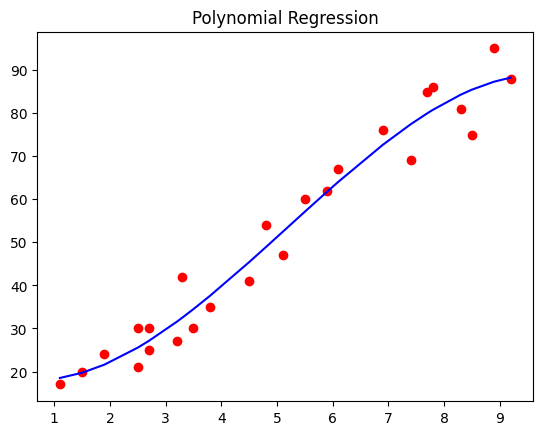

In [75]:
plt.scatter(X,Y,color='red')
# Sort X and Y_pred based on the values in X to plot a smooth line
sorted_X = np.sort(X, axis=0)
sorted_Y_pred = model.predict(poly.fit_transform(sorted_X))
plt.plot(sorted_X, sorted_Y_pred, color='blue')
plt.title('Polynomial Regression')
plt.show()

In [76]:
#6 (Task)

dataset = pd.read_csv('/content/50_Startups-61ce93eb-d671-42db-a5e1-005e0a176393.csv')
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values


In [77]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [79]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
print(X_poly)

[[1.00000000e+00 1.65349200e+05 1.36897800e+05 ... 1.96798978e+27
  6.78218559e+27 2.33731099e+28]
 [1.00000000e+00 1.62597700e+05 1.51377590e+05 ... 2.00435339e+27
  5.87755111e+27 1.72352876e+28]
 [1.00000000e+00 1.53441510e+05 1.01145550e+05 ... 6.94488401e+26
  2.80097154e+27 1.12967208e+28]
 ...
 [1.00000000e+00 0.00000000e+00 1.35426920e+05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.42050000e+02 5.17431500e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 1.16983800e+05 ... 1.26150792e+24
  4.87128755e+23 1.88103793e+23]]


In [ ]:
model=LinearRegression()
model.fit(X_poly,Y)
print(model.coef_)
print(model.intercept_)
Y_pred=model.predict(X_poly)
print(Y_pred)
plt.scatter(X[:, 1],Y,color='red') # Scatter plot original X and Y
plt.plot(X,Y_pred,color='blue') # Plot regression line using original X and predicted Y
plt.title('polynimail regression')
plt.show()